In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import statsmodels.api as sm
import warnings

In [2]:
data = pd.read_excel(r"CRY.xlsx", sheet_name = "Empirical Model")

# DATA PREPROCESSING

In [3]:
print("Columns:")
print(data.columns)

Columns:
Index(['Unnamed: 0', 'Empirical Model - Total US', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9',
       ...
       'Unnamed: 795', 'Unnamed: 796', 'Unnamed: 797', 'Unnamed: 798',
       'Unnamed: 799', 'Unnamed: 800', 'Unnamed: 801', 'Unnamed: 802',
       'Unnamed: 803', 'Unnamed: 804'],
      dtype='object', length=805)


In [4]:
data.head()

,Unnamed: 0,Empirical Model - Total US,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 795,Unnamed: 796,Unnamed: 797,Unnamed: 798,Unnamed: 799,Unnamed: 800,Unnamed: 801,Unnamed: 802,Unnamed: 803,Unnamed: 804
0,NaN,Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Fiscal year ends December 31st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,...,9955,9956,10015,10018,10085,10101,10103,10364,10633,Grand Total


In [5]:
data = data.drop([0,1,2,3], axis = 0)

In [6]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [7]:
data.head()

,Empirical Model - Total US,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 795,Unnamed: 796,Unnamed: 797,Unnamed: 798,Unnamed: 799,Unnamed: 800,Unnamed: 801,Unnamed: 802,Unnamed: 803,Unnamed: 804
4,NaN,NaN,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac,...,9955,9956,10015,10018,10085,10101,10103,10364,10633,Grand Total
5,Q109,2009-01-01,239327,817622,0.292711,NaN,NaN,NaN,24,9971.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239327
6,Q109,2009-02-01,239655,817622,0.293112,NaN,NaN,NaN,24,9985.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239655
7,Q109,2009-03-01,338640,817622,0.414177,22744000,NaN,0.0359489,23,14723.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338640
8,Q209,2009-04-01,465898,1729262,0.26942,NaN,NaN,NaN,37,12591.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465898


In [8]:
data.loc[4, 'Unnamed: 2'] = 'DateTime'

In [9]:
data = data.reset_index()
data.head()

,index,Empirical Model - Total US,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 795,Unnamed: 796,Unnamed: 797,Unnamed: 798,Unnamed: 799,Unnamed: 800,Unnamed: 801,Unnamed: 802,Unnamed: 803,Unnamed: 804
0,4,NaN,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,...,9955,9956,10015,10018,10085,10101,10103,10364,10633,Grand Total
1,5,Q109,2009-01-01,239327,817622,0.292711,NaN,NaN,NaN,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239327
2,6,Q109,2009-02-01,239655,817622,0.293112,NaN,NaN,NaN,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239655
3,7,Q109,2009-03-01,338640,817622,0.414177,22744000,NaN,0.0359489,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338640
4,8,Q209,2009-04-01,465898,1729262,0.26942,NaN,NaN,NaN,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465898


In [10]:
data.columns = data.iloc[0]
data = data.reindex(data.index.drop(0))

In [11]:
data.head()

,4,nan,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,...,9955,9956,10015,10018,10085,10101,10103,10364,10633,Grand Total
1,5,Q109,2009-01-01,239327,817622,0.292711,NaN,NaN,NaN,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239327
2,6,Q109,2009-02-01,239655,817622,0.293112,NaN,NaN,NaN,24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239655
3,7,Q109,2009-03-01,338640,817622,0.414177,22744000,NaN,0.0359489,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338640
4,8,Q209,2009-04-01,465898,1729262,0.26942,NaN,NaN,NaN,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465898
5,9,Q209,2009-05-01,531263,1729262,0.307219,NaN,NaN,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531263


In [12]:
data = data.drop([4], axis = 1)

In [13]:
data.head()

,nan,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac,...,9955,9956,10015,10018,10085,10101,10103,10364,10633,Grand Total
1,Q109,2009-01-01,239327,817622,0.292711,NaN,NaN,NaN,24,9971.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239327
2,Q109,2009-02-01,239655,817622,0.293112,NaN,NaN,NaN,24,9985.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239655
3,Q109,2009-03-01,338640,817622,0.414177,22744000,NaN,0.0359489,23,14723.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338640
4,Q209,2009-04-01,465898,1729262,0.26942,NaN,NaN,NaN,37,12591.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465898
5,Q209,2009-05-01,531263,1729262,0.307219,NaN,NaN,NaN,45,11805.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531263


In [14]:
#data = data.reindex(data.index.drop(0))
data.columns

Index([                     nan,               'DateTime',
                'Monthly Sales',        'Quarterly sales',
         'Monthly Contribution',         'Reported Sales',
                  'Growth Rate', '% Sales Captured in DB',
                    '# of facs',              'Sales/fac',
       ...
                           9955,                     9956,
                          10015,                    10018,
                          10085,                    10101,
                          10103,                    10364,
                          10633,            'Grand Total'],
      dtype='object', name=0, length=804)

In [15]:
data = data.iloc[:,1:]

In [16]:
data

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac,nan,...,9955,9956,10015,10018,10085,10101,10103,10364,10633,Grand Total
1,2009-01-01,239327,817622,0.292711,NaN,NaN,NaN,24,9971.96,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239327
2,2009-02-01,239655,817622,0.293112,NaN,NaN,NaN,24,9985.62,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239655
3,2009-03-01,338640,817622,0.414177,22744000,NaN,0.0359489,23,14723.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,338640
4,2009-04-01,465898,1729262,0.26942,NaN,NaN,NaN,37,12591.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,465898
5,2009-05-01,531263,1729262,0.307219,NaN,NaN,NaN,45,11805.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,531263
6,2009-06-01,732101,1729262,0.42336,23579000,NaN,0.0733391,55,13310.9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732101
7,2009-07-01,772985,2.41856e+06,0.319606,NaN,NaN,NaN,54,14314.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772985
8,2009-08-01,759454,2.41856e+06,0.314011,NaN,NaN,NaN,54,14064,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,759454
9,2009-09-01,886120,2.41856e+06,0.366383,23941000,NaN,0.101022,57,15546,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,886120
10,2009-10-01,896866,2.65806e+06,0.337413,NaN,NaN,NaN,68,13189.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896866


In [17]:
data2 = data[["DateTime","Monthly Sales","Quarterly sales","Monthly Contribution","Reported Sales","Growth Rate","% Sales Captured in DB","# of facs","Sales/fac"]]

In [18]:
data2.head()

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
1,2009-01-01,239327,817622,0.292711,NaN,NaN,NaN,24,9971.96
2,2009-02-01,239655,817622,0.293112,NaN,NaN,NaN,24,9985.62
3,2009-03-01,338640,817622,0.414177,22744000,NaN,0.0359489,23,14723.5
4,2009-04-01,465898,1729262,0.26942,NaN,NaN,NaN,37,12591.8
5,2009-05-01,531263,1729262,0.307219,NaN,NaN,NaN,45,11805.8


In [19]:
data2.describe()

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
count,130,142.0,132.00,128.000000,39,35.000000,58,136,127
unique,130,142.0,54.00,128.000000,39,35.000000,51,91,122
top,2018-09-01,1391358.7,7445759.84,0.323476,28819000,-0.010514,Correction factor,0,0
freq,1,1.0,3.00,1.000000,1,1.000000,3,6,4


In [20]:
data3 = data2.copy()

In [21]:
data3.head()

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
1,2009-01-01,239327,817622,0.292711,NaN,NaN,NaN,24,9971.96
2,2009-02-01,239655,817622,0.293112,NaN,NaN,NaN,24,9985.62
3,2009-03-01,338640,817622,0.414177,22744000,NaN,0.0359489,23,14723.5
4,2009-04-01,465898,1729262,0.26942,NaN,NaN,NaN,37,12591.8
5,2009-05-01,531263,1729262,0.307219,NaN,NaN,NaN,45,11805.8


In [22]:
cols = ["Reported Sales", "% Sales Captured in DB"]
data3[cols] = data3[cols].bfill()

In [23]:
data3

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
1,2009-01-01,239327,817622,0.292711,22744000.0,NaN,0.0359489,24,9971.96
2,2009-02-01,239655,817622,0.293112,22744000.0,NaN,0.0359489,24,9985.62
3,2009-03-01,338640,817622,0.414177,22744000.0,NaN,0.0359489,23,14723.5
4,2009-04-01,465898,1729262,0.26942,23579000.0,NaN,0.0733391,37,12591.8
5,2009-05-01,531263,1729262,0.307219,23579000.0,NaN,0.0733391,45,11805.8
6,2009-06-01,732101,1729262,0.42336,23579000.0,NaN,0.0733391,55,13310.9
7,2009-07-01,772985,2.41856e+06,0.319606,23941000.0,NaN,0.101022,54,14314.5
8,2009-08-01,759454,2.41856e+06,0.314011,23941000.0,NaN,0.101022,54,14064
9,2009-09-01,886120,2.41856e+06,0.366383,23941000.0,NaN,0.101022,57,15546
10,2009-10-01,896866,2.65806e+06,0.337413,23830000.0,NaN,0.111543,68,13189.2


In [24]:
data4 = data3.iloc[:117]

In [25]:
data4.head()

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
1,2009-01-01,239327,817622,0.292711,22744000.0,NaN,0.0359489,24,9971.96
2,2009-02-01,239655,817622,0.293112,22744000.0,NaN,0.0359489,24,9985.62
3,2009-03-01,338640,817622,0.414177,22744000.0,NaN,0.0359489,23,14723.5
4,2009-04-01,465898,1729262,0.26942,23579000.0,NaN,0.0733391,37,12591.8
5,2009-05-01,531263,1729262,0.307219,23579000.0,NaN,0.0733391,45,11805.8


In [26]:
data4

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
1,2009-01-01,239327,817622,0.292711,22744000.0,NaN,0.0359489,24,9971.96
2,2009-02-01,239655,817622,0.293112,22744000.0,NaN,0.0359489,24,9985.62
3,2009-03-01,338640,817622,0.414177,22744000.0,NaN,0.0359489,23,14723.5
4,2009-04-01,465898,1729262,0.26942,23579000.0,NaN,0.0733391,37,12591.8
5,2009-05-01,531263,1729262,0.307219,23579000.0,NaN,0.0733391,45,11805.8
6,2009-06-01,732101,1729262,0.42336,23579000.0,NaN,0.0733391,55,13310.9
7,2009-07-01,772985,2.41856e+06,0.319606,23941000.0,NaN,0.101022,54,14314.5
8,2009-08-01,759454,2.41856e+06,0.314011,23941000.0,NaN,0.101022,54,14064
9,2009-09-01,886120,2.41856e+06,0.366383,23941000.0,NaN,0.101022,57,15546
10,2009-10-01,896866,2.65806e+06,0.337413,23830000.0,NaN,0.111543,68,13189.2


In [27]:
data5 = data4.copy() 

In [28]:
data5.iloc[:12, 4] = 0.0

In [29]:
data5

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
1,2009-01-01,239327,817622,0.292711,0.0,NaN,0.0359489,24,9971.96
2,2009-02-01,239655,817622,0.293112,0.0,NaN,0.0359489,24,9985.62
3,2009-03-01,338640,817622,0.414177,0.0,NaN,0.0359489,23,14723.5
4,2009-04-01,465898,1729262,0.26942,0.0,NaN,0.0733391,37,12591.8
5,2009-05-01,531263,1729262,0.307219,0.0,NaN,0.0733391,45,11805.8
6,2009-06-01,732101,1729262,0.42336,0.0,NaN,0.0733391,55,13310.9
7,2009-07-01,772985,2.41856e+06,0.319606,0.0,NaN,0.101022,54,14314.5
8,2009-08-01,759454,2.41856e+06,0.314011,0.0,NaN,0.101022,54,14064
9,2009-09-01,886120,2.41856e+06,0.366383,0.0,NaN,0.101022,57,15546
10,2009-10-01,896866,2.65806e+06,0.337413,0.0,NaN,0.111543,68,13189.2


In [30]:
data6 = data5.copy()

In [31]:
data6.describe()

,Reported Sales
count,1.170000e+02
mean,2.578472e+07
std,9.563530e+06
min,0.000000e+00
25%,2.442100e+07
50%,2.703400e+07
75%,3.223800e+07
max,3.671900e+07


In [32]:
data7 = data4.copy()

In [33]:
cols = [4]
data7['Growth Rate'] = data7['Growth Rate'].bfill()
data7

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
1,2009-01-01,239327,817622,0.292711,22744000.0,0.096069,0.0359489,24,9971.96
2,2009-02-01,239655,817622,0.293112,22744000.0,0.096069,0.0359489,24,9985.62
3,2009-03-01,338640,817622,0.414177,22744000.0,0.096069,0.0359489,23,14723.5
4,2009-04-01,465898,1729262,0.26942,23579000.0,0.096069,0.0733391,37,12591.8
5,2009-05-01,531263,1729262,0.307219,23579000.0,0.096069,0.0733391,45,11805.8
6,2009-06-01,732101,1729262,0.42336,23579000.0,0.096069,0.0733391,55,13310.9
7,2009-07-01,772985,2.41856e+06,0.319606,23941000.0,0.096069,0.101022,54,14314.5
8,2009-08-01,759454,2.41856e+06,0.314011,23941000.0,0.096069,0.101022,54,14064
9,2009-09-01,886120,2.41856e+06,0.366383,23941000.0,0.096069,0.101022,57,15546
10,2009-10-01,896866,2.65806e+06,0.337413,23830000.0,0.096069,0.111543,68,13189.2


In [34]:
data7.describe()

,Reported Sales,Growth Rate
count,1.170000e+02,117.000000
mean,2.819738e+07,0.055054
std,4.166999e+06,0.057490
min,2.274400e+07,-0.048038
25%,2.442100e+07,0.015030
50%,2.703400e+07,0.051014
75%,3.223800e+07,0.096069
max,3.671900e+07,0.231162


In [35]:
data7.shape
data7.head()

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
1,2009-01-01,239327,817622,0.292711,22744000.0,0.096069,0.0359489,24,9971.96
2,2009-02-01,239655,817622,0.293112,22744000.0,0.096069,0.0359489,24,9985.62
3,2009-03-01,338640,817622,0.414177,22744000.0,0.096069,0.0359489,23,14723.5
4,2009-04-01,465898,1729262,0.26942,23579000.0,0.096069,0.0733391,37,12591.8
5,2009-05-01,531263,1729262,0.307219,23579000.0,0.096069,0.0733391,45,11805.8


# PLOTS

In [36]:
import matplotlib.pyplot as plt



In [37]:
data7.columns

Index(['DateTime', 'Monthly Sales', 'Quarterly sales', 'Monthly Contribution',
       'Reported Sales', 'Growth Rate', '% Sales Captured in DB', '# of facs',
       'Sales/fac'],
      dtype='object', name=0)

In [38]:
data7.describe( include = 'all')

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
count,117,117.0,117.00,117.000000,1.170000e+02,117.000000,117.000000,117.0,117.000000
unique,117,117.0,39.00,117.000000,NaN,NaN,39.000000,80.0,117.000000
top,2018-09-01,1391358.7,7445759.84,0.323476,NaN,NaN,0.111543,195.0,18175.961685
freq,1,1.0,3.00,1.000000,NaN,NaN,3.000000,4.0,1.000000
mean,NaN,NaN,NaN,NaN,2.819738e+07,0.055054,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,4.166999e+06,0.057490,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,2.274400e+07,-0.048038,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,2.442100e+07,0.015030,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,2.703400e+07,0.051014,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,3.223800e+07,0.096069,NaN,NaN,NaN


In [39]:
data8 = data7.copy()

In [40]:
data8.head()

,DateTime,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
1,2009-01-01,239327,817622,0.292711,22744000.0,0.096069,0.0359489,24,9971.96
2,2009-02-01,239655,817622,0.293112,22744000.0,0.096069,0.0359489,24,9985.62
3,2009-03-01,338640,817622,0.414177,22744000.0,0.096069,0.0359489,23,14723.5
4,2009-04-01,465898,1729262,0.26942,23579000.0,0.096069,0.0733391,37,12591.8
5,2009-05-01,531263,1729262,0.307219,23579000.0,0.096069,0.0733391,45,11805.8


In [41]:
data8["Monthly Sales"] = pd.to_numeric(data8["Monthly Sales"])
data8["Quarterly sales"] = pd.to_numeric(data8["Quarterly sales"])
data8["Monthly Contribution"] = pd.to_numeric(data8["Monthly Contribution"])
data8["% Sales Captured in DB"] = pd.to_numeric(data8["% Sales Captured in DB"])
data8["# of facs"] = pd.to_numeric(data8["# of facs"])
data8["Sales/fac"] = pd.to_numeric(data8["Sales/fac"])

In [42]:
data8.describe()

,Monthly Sales,Quarterly sales,Monthly Contribution,Reported Sales,Growth Rate,% Sales Captured in DB,# of facs,Sales/fac
count,1.170000e+02,1.170000e+02,117.000000,1.170000e+02,117.000000,117.000000,117.000000,117.000000
mean,2.161770e+06,6.485309e+06,0.333333,2.819738e+07,0.055054,0.218980,136.512821,15125.227466
std,1.105165e+06,3.259648e+06,0.038311,4.166999e+06,0.057490,0.083815,53.866952,2708.292848
min,2.393270e+05,8.176220e+05,0.236286,2.274400e+07,-0.048038,0.035949,23.000000,9691.869355
25%,1.222003e+06,3.611127e+06,0.314011,2.442100e+07,0.015030,0.139276,91.000000,13096.901802
50%,2.008837e+06,6.553341e+06,0.330831,2.703400e+07,0.051014,0.235961,142.000000,14975.214080
75%,3.175927e+06,1.003649e+07,0.349184,3.223800e+07,0.096069,0.301899,188.000000,16913.624154
max,4.328962e+06,1.216667e+07,0.454866,3.671900e+07,0.231162,0.331345,234.000000,21651.503374


In [43]:
data8['DateTime'] = pd.to_datetime(data8['DateTime'], format = "%Y-%m-%d")

data8['DateTime'].dtype

dtype('<M8[ns]')

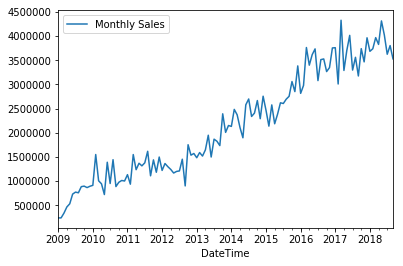

In [44]:
data8.plot(x='DateTime', y='Monthly Sales')


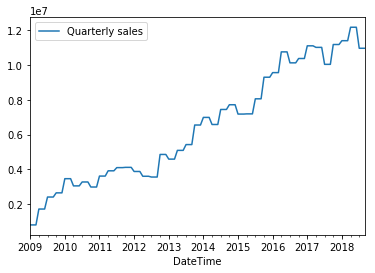

In [45]:
data8.plot(x='DateTime', y='Quarterly sales')


# MONTHLY SALES

In [46]:
monthly_data = data8.iloc[:,:2]
monthly_data.columns
#monthly_data.set_index('DateTime', inplace=True)
#monthly_data.columns


Index(['DateTime', 'Monthly Sales'], dtype='object', name=0)

In [47]:
from datetime import datetime
con = monthly_data['DateTime']
#data5['DateTime'] = pd.to_datetime(data5['DataTime'])
monthly_data.set_index('DateTime',inplace = True)
monthly_data.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', name='DateTime', length=117, freq=None)

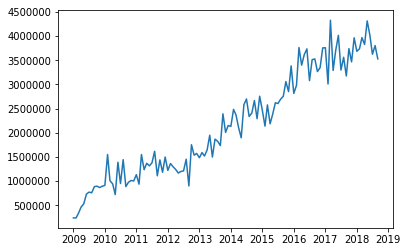

In [48]:
plt.plot(monthly_data)

In [49]:
ts = monthly_data['Monthly Sales']
ts.head()

DateTime
2009-01-01    239327.0
2009-02-01    239655.0
2009-03-01    338640.0
2009-04-01    465898.0
2009-05-01    531263.0
Name: Monthly Sales, dtype: float64

In [50]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window= 12, cutoff = 0.01):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #rolstd = pd.rolling_std(timeseries, window=12)
    
    
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
  #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print (dfoutput) 

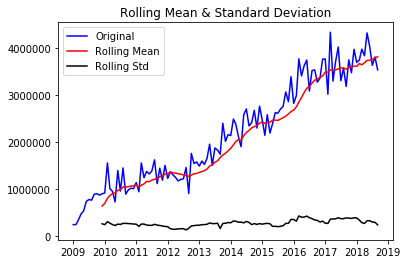

Results of Dickey-Fuller Test:
p-value = 0.9310. The series is likely non-stationary.
Test Statistic                  -0.259581
p-value                          0.931037
#Lags Used                      11.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


In [51]:
test_stationarity(ts)

## TREND

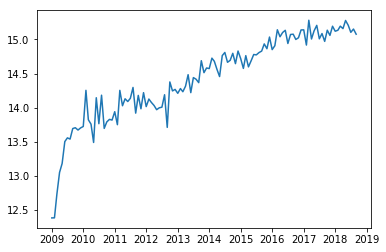

In [52]:
import numpy as np
ts_log = np.log(ts)
plt.plot(ts_log)

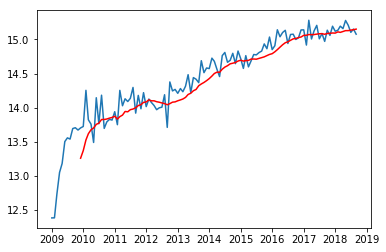

In [53]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color = 'red')

In [54]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

DateTime
2009-01-01   NaN
2009-02-01   NaN
2009-03-01   NaN
2009-04-01   NaN
2009-05-01   NaN
Name: Monthly Sales, dtype: float64

In [55]:
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head(12)

DateTime
2009-12-01    0.443830
2010-01-01    0.353297
2010-02-01    0.727051
2010-03-01    0.205308
2010-04-01    0.081644
2010-05-01   -0.211818
2010-06-01    0.389633
2010-07-01   -0.007975
2010-08-01    0.355932
2010-09-01   -0.130511
2010-10-01   -0.042518
2010-11-01   -0.018123
Name: Monthly Sales, dtype: float64

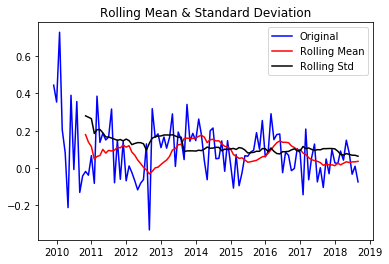

Results of Dickey-Fuller Test:
p-value = 0.1652. The series is likely non-stationary.
Test Statistic                 -2.321241
p-value                         0.165209
#Lags Used                     11.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [56]:
test_stationarity(ts_log_moving_avg_diff)

## SEASONALITY ( along with TREND )

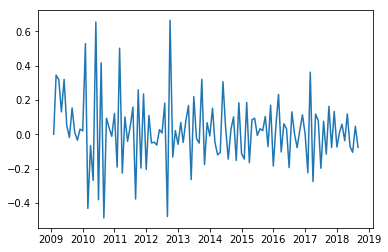

In [57]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

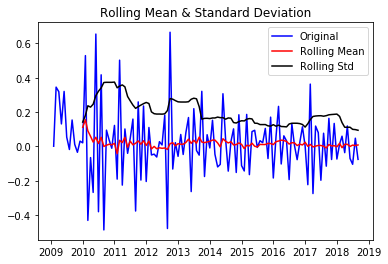

Results of Dickey-Fuller Test:
p-value = 0.0019. The series is likely stationary.
Test Statistic                  -3.916825
p-value                          0.001914
#Lags Used                      10.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


In [58]:
ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)

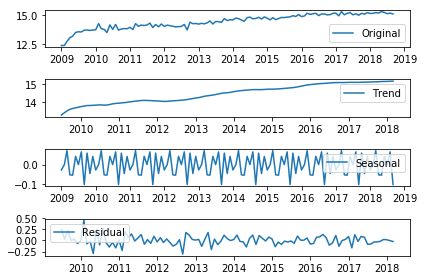

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.subplot(411)
plt.plot(ts_log, label = "Original")
plt.legend(loc = "best")
plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc = "best")
plt.subplot(413)
plt.plot(seasonal, label = "Seasonal")
plt.legend(loc = "best")
plt.subplot(414)
plt.plot(residual, label = "Residual")
plt.legend(loc = "best")
plt.tight_layout()

## Forecasting the Time Series ( Montly Sales)

In [60]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags = 2)
lag_pacf = pacf(ts_log_diff, nlags = 2, method = "ols")


### ACF and PACF

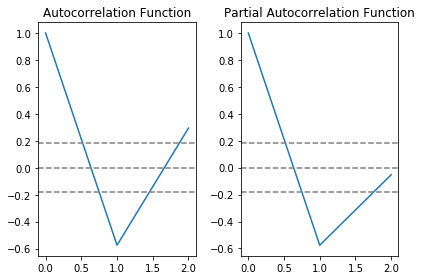

In [61]:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/ np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/ np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/ np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/ np.sqrt(len(ts_log_diff)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## MOVING AVERAGE MODEL

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0002')

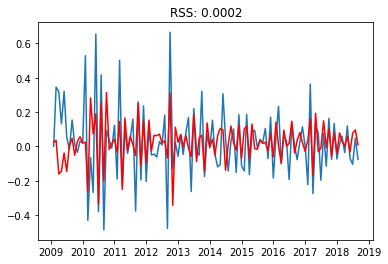

In [62]:
model = ARIMA(ts_log, order = (1 , 1, 0) )
results_MA = model.fit(disp = -1)
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum(results_MA.fittedvalues - ts_log_diff)**2)

In [63]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy = True)
print (predictions_MA_diff.tail())

DateTime
2018-05-01    0.057640
2018-06-01   -0.031175
2018-07-01    0.077023
2018-08-01    0.096343
2018-09-01    0.009546
dtype: float64


In [64]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

DateTime
2009-02-01    0.023577
2009-03-01    0.059828
2009-04-01   -0.100452
2009-05-01   -0.245489
2009-06-01   -0.283384
dtype: float64


In [65]:
predictions_MA_log = pd.Series(ts_log.ix[0], index = ts_log.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum, fill_value = 0)
predictions_MA_log.head()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


DateTime
2009-01-01    12.385586
2009-02-01    12.409163
2009-03-01    12.445414
2009-04-01    12.285134
2009-05-01    12.140097
dtype: float64

Text(0.5, 1.0, 'RMSE: 1307912.6182')

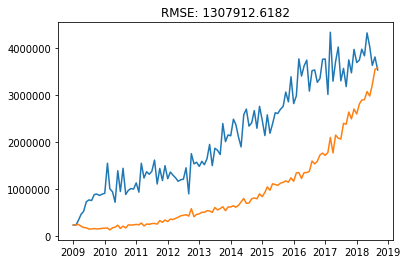

In [66]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(ts)
plt.plot(predictions_MA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA - ts)**2) / len(ts)))

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


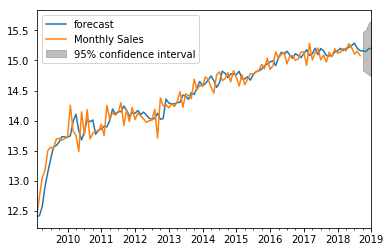

In [67]:
results_MA.plot_predict(1,120)
X = results_MA.forecast(steps = 3)


## QUARTERLY SALES

In [68]:
quarterly_data = data8.iloc[:,:3]

In [69]:
quarterly_data.head()

,DateTime,Monthly Sales,Quarterly sales
1,2009-01-01,239327.0,817622.0
2,2009-02-01,239655.0,817622.0
3,2009-03-01,338640.0,817622.0
4,2009-04-01,465898.0,1729262.0
5,2009-05-01,531263.0,1729262.0


In [70]:
quarterly_data = quarterly_data.drop(["Monthly Sales"], axis = 1)

In [71]:
quarterly_data.head()

,DateTime,Quarterly sales
1,2009-01-01,817622.0
2,2009-02-01,817622.0
3,2009-03-01,817622.0
4,2009-04-01,1729262.0
5,2009-05-01,1729262.0


In [72]:
from datetime import datetime
con = quarterly_data['DateTime']
#data5['DateTime'] = pd.to_datetime(data5['DataTime'])
quarterly_data.set_index('DateTime',inplace = True)
quarterly_data.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01',
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01'],
              dtype='datetime64[ns]', name='DateTime', length=117, freq=None)

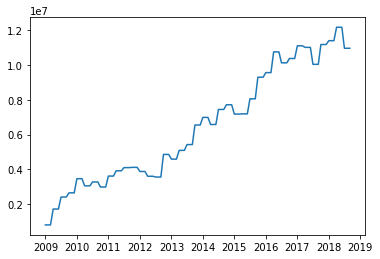

In [73]:
plt.plot(quarterly_data)

In [74]:
ts2 = quarterly_data['Quarterly sales']
ts2.head()

DateTime
2009-01-01     817622.0
2009-02-01     817622.0
2009-03-01     817622.0
2009-04-01    1729262.0
2009-05-01    1729262.0
Name: Quarterly sales, dtype: float64

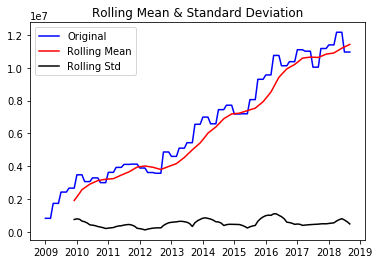

Results of Dickey-Fuller Test:
p-value = 0.7202. The series is likely non-stationary.
Test Statistic                  -1.087029
p-value                          0.720217
#Lags Used                       0.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


In [75]:
test_stationarity(ts2)

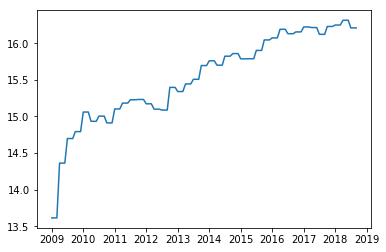

In [76]:
import numpy as np
ts2_log = np.log(ts2)
plt.plot(ts2_log)

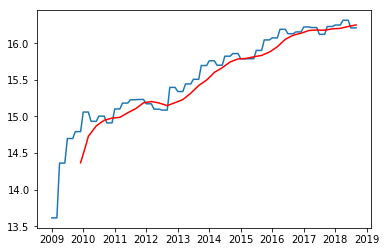

In [77]:
moving_avg2 = ts2_log.rolling(12).mean()
plt.plot(ts2_log)
plt.plot(moving_avg2, color = 'red')

In [78]:
ts_log_moving_avg_diff2 = ts2_log - moving_avg2
ts_log_moving_avg_diff2.head()

DateTime
2009-01-01   NaN
2009-02-01   NaN
2009-03-01   NaN
2009-04-01   NaN
2009-05-01   NaN
Name: Quarterly sales, dtype: float64

In [79]:
ts_log_moving_avg_diff2.dropna(inplace = True)
ts_log_moving_avg_diff2.head(12)

DateTime
2009-12-01    0.425820
2010-01-01    0.572452
2010-02-01    0.451944
2010-03-01    0.331436
2010-04-01    0.157206
2010-05-01    0.109677
2010-06-01    0.062149
2010-07-01    0.107442
2010-08-01    0.081973
2010-09-01    0.056505
2010-10-01   -0.045775
2010-11-01   -0.055677
Name: Quarterly sales, dtype: float64

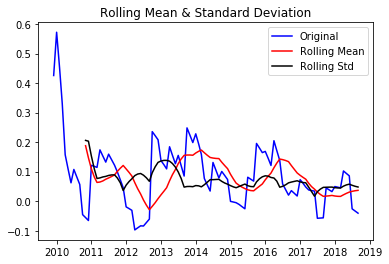

Results of Dickey-Fuller Test:
p-value = 0.0034. The series is likely stationary.
Test Statistic                  -3.751546
p-value                          0.003444
#Lags Used                       0.000000
Number of Observations Used    105.000000
Critical Value (1%)             -3.494220
Critical Value (5%)             -2.889485
Critical Value (10%)            -2.581676
dtype: float64


In [80]:
test_stationarity(ts_log_moving_avg_diff2)

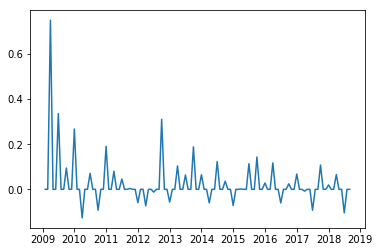

In [81]:
ts_log_diff2 = ts2_log - ts2_log.shift()
plt.plot(ts_log_diff2)

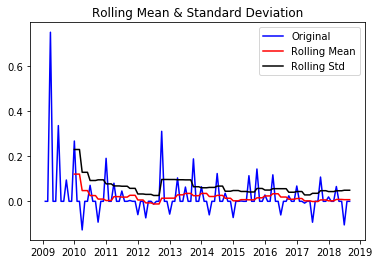

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -1.124061e+01
p-value                        1.811018e-20
#Lags Used                     0.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
Critical Value (10%)          -2.580360e+00
dtype: float64


In [82]:
ts_log_diff2.dropna(inplace = True)
test_stationarity(ts_log_diff2)

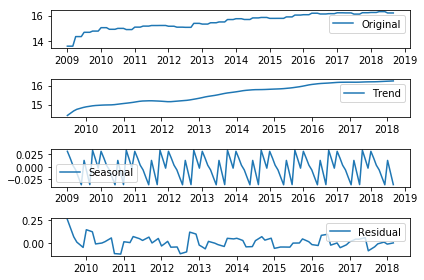

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts2_log)

trend2 = decomposition.trend
seasonal2 = decomposition.seasonal
residual2 = decomposition.resid


plt.subplot(411)
plt.plot(ts2_log, label = "Original")
plt.legend(loc = "best")
plt.subplot(412)
plt.plot(trend2, label = "Trend")
plt.legend(loc = "best")
plt.subplot(413)
plt.plot(seasonal2, label = "Seasonal")
plt.legend(loc = "best")
plt.subplot(414)
plt.plot(residual2, label = "Residual")
plt.legend(loc = "best")
plt.tight_layout()

## Forecasting the Time Series ( Quarterly Data )

In [84]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf2 = acf(ts_log_diff2, nlags = 2)
lag_pacf2 = pacf(ts_log_diff2, nlags = 2, method = "ols")


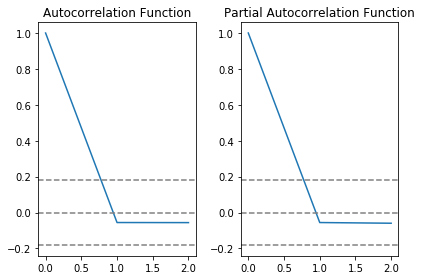

In [85]:
plt.subplot(121)
plt.plot(lag_acf2)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/ np.sqrt(len(ts_log_diff2)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/ np.sqrt(len(ts_log_diff2)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf2)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/ np.sqrt(len(ts_log_diff2)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/ np.sqrt(len(ts_log_diff2)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
F:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 0.0000')

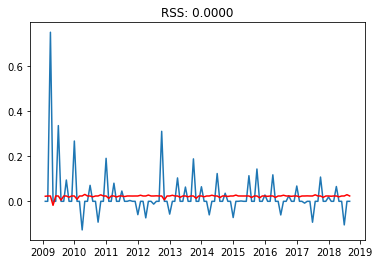

In [86]:
model2 = ARIMA(ts2_log, order = (1 , 1, 0) )
results_MA2 = model2.fit(disp = -1)
plt.plot(ts_log_diff2)
plt.plot(results_MA2.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum(results_MA2.fittedvalues - ts_log_diff2)**2)

In [87]:
predictions_MA_diff2 = pd.Series(results_MA2.fittedvalues, copy = True)
print (predictions_MA_diff2.tail())

DateTime
2018-05-01    0.020007
2018-06-01    0.023635
2018-07-01    0.023635
2018-08-01    0.029415
2018-09-01    0.023635
dtype: float64


In [88]:
predictions_MA_diff_cumsum2 = predictions_MA_diff2.cumsum()
print(predictions_MA_diff_cumsum2.head())

DateTime
2009-02-01    0.022396
2009-03-01    0.046031
2009-04-01    0.069666
2009-05-01    0.051858
2009-06-01    0.075493
dtype: float64


In [89]:
predictions_MA_log2 = pd.Series(ts2_log.ix[0], index = ts2_log.index)
predictions_MA_log2 = predictions_MA_log2.add(predictions_MA_diff_cumsum2, fill_value = 0)
predictions_MA_log2.head()

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


DateTime
2009-01-01    13.614155
2009-02-01    13.636551
2009-03-01    13.660186
2009-04-01    13.683822
2009-05-01    13.666014
dtype: float64

Text(0.5, 1.0, 'RMSE: 2882366.0165')

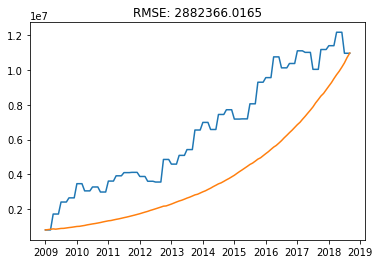

In [90]:
predictions_MA2 = np.exp(predictions_MA_log2)
plt.plot(ts2)
plt.plot(predictions_MA2)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA2 - ts2)**2) / len(ts2)))

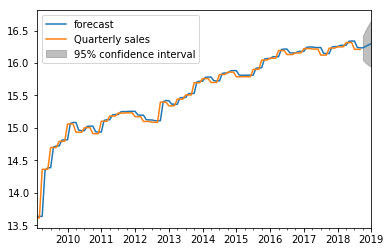

In [91]:
results_MA2.plot_predict(1,120)
X = results_MA2.forecast(steps = 3)


In [92]:
type(results_MA2)

statsmodels.tsa.arima_model.ARIMAResultsWrapper

# PROPHET MODEL (monthly sales)

In [93]:
from fbprophet import Prophet
plt.style.use('fivethirtyeight')

In [94]:
playoffs = pd.DataFrame({
  'holiday' : 'playoff',
  'ds' : pd.to_datetime(['2013-01-12','2013-07-12','2013-12-24','2014-01-12', '2014-07-12', '2014-07-19',
                 '2014-07-02','2014-12-24', '2015-07-11','2015-12-24', '2016-07-17',
                 '2016-07-24', '2016-07-07','2016-07-24','2016-12-24','2017-07-17','2017-07-24','2017-07-07','2017-12-24']),
  'lower_window' : 0,
  'upper_window' : 2}
)
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2013-01-01','2013-01-21','2013-02-14','2013-02-18',
'2013-05-27','2013-07-04','2013-09-02','2013-10-14','2013-11-11','2013-11-28','2013-12-25','2014-01-01','2014-01-20','2014-02-14','2014-02-17',
'2014-05-26','2014-07-04','2014-09-01','2014-10-13','2014-11-11','2014-11-27','2014-12-25','2015-01-01','2015-01-19','2015-02-14','2015-02-16',
'2015-05-25','2015-07-03','2015-09-07','2015-10-12','2015-11-11','2015-11-26','2015-12-25','2016-01-01','2016-01-18','2016-02-14','2016-02-15',
'2016-05-30','2016-07-04','2016-09-05','2016-10-10','2016-11-11','2016-11-24','2016-12-25','2017-01-02','2017-01-16','2017-02-14','2017-02-20',
'2017-05-29','2017-07-04','2017-09-04','2017-10-09','2017-11-10','2017-11-23','2017-12-25','2018-01-01','2018-01-15','2018-02-14','2018-02-19'
                       ]),
  'lower_window': 0,
  'upper_window': 3,
})

holidays = pd.concat((playoffs, superbowls))

In [95]:
df = data8.iloc[:,:2]
df.head()

,DateTime,Monthly Sales
1,2009-01-01,239327.0
2,2009-02-01,239655.0
3,2009-03-01,338640.0
4,2009-04-01,465898.0
5,2009-05-01,531263.0


In [96]:
df = df.rename(columns={'DateTime': 'ds',
                        'Monthly Sales': 'y'})

df.head(5)

,ds,y
1,2009-01-01,239327.0
2,2009-02-01,239655.0
3,2009-03-01,338640.0
4,2009-04-01,465898.0
5,2009-05-01,531263.0


In [97]:
#df.set_index('ds', inplace = True)


In [98]:
#df.head()

In [99]:
my_model = Prophet(interval_width=0.95,holidays=holidays)

In [100]:
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
F:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [101]:
future_dates = my_model.make_future_dataframe(periods=3, freq='MS')
future_dates.tail()

,ds
115,2018-08-01
116,2018-09-01
117,2018-10-01
118,2018-11-01
119,2018-12-01


In [102]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
115,2018-08-01,4.100272e+06,3.633077e+06,4.564877e+06
116,2018-09-01,3.895435e+06,3.415919e+06,4.342792e+06
117,2018-10-01,4.251130e+06,3.798551e+06,4.693875e+06
118,2018-11-01,4.069373e+06,3.574437e+06,4.585031e+06
119,2018-12-01,4.339406e+06,3.842140e+06,4.851361e+06


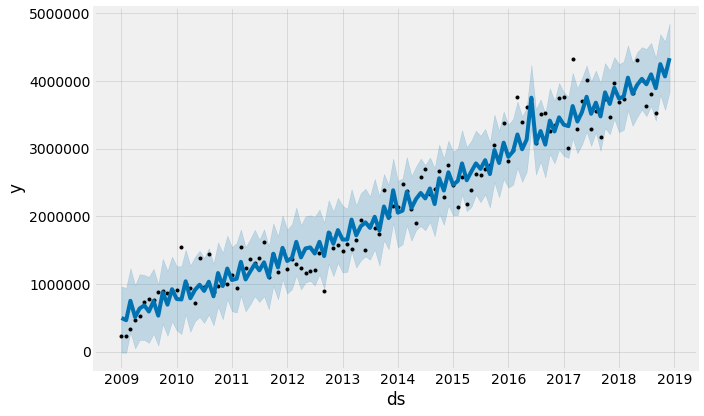

In [103]:
my_model.plot(forecast,
              uncertainty=True);

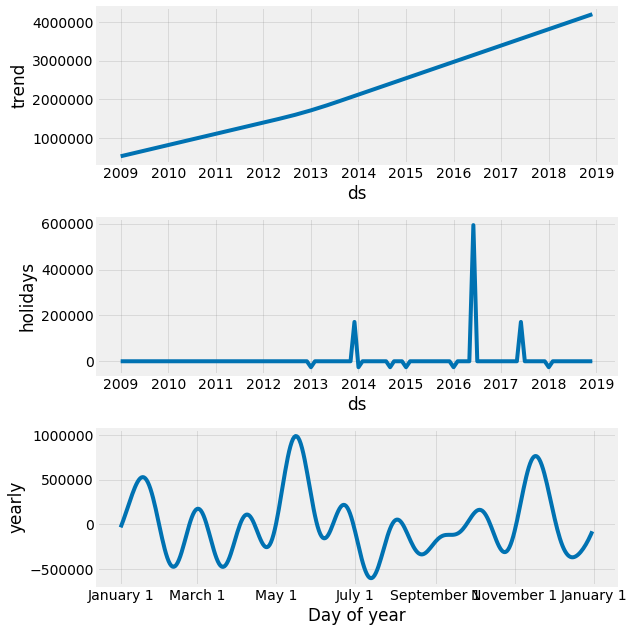

In [104]:
my_model.plot_components(forecast);

# PROPHET MODEL (quarterly sales)

In [105]:
df2 = data8.iloc[:,:3]
df2.head()

,DateTime,Monthly Sales,Quarterly sales
1,2009-01-01,239327.0,817622.0
2,2009-02-01,239655.0,817622.0
3,2009-03-01,338640.0,817622.0
4,2009-04-01,465898.0,1729262.0
5,2009-05-01,531263.0,1729262.0


In [106]:
df2 = df2.drop(["Monthly Sales"], axis = 1)
df2.head()

,DateTime,Quarterly sales
1,2009-01-01,817622.0
2,2009-02-01,817622.0
3,2009-03-01,817622.0
4,2009-04-01,1729262.0
5,2009-05-01,1729262.0


In [107]:
df2 = df.rename(columns={'DateTime': 'ds',
                        'Quarterly sales': 'y'})

df2.head(5)

,ds,y
1,2009-01-01,239327.0
2,2009-02-01,239655.0
3,2009-03-01,338640.0
4,2009-04-01,465898.0
5,2009-05-01,531263.0


In [108]:
my_model2 = Prophet(interval_width=0.95, holidays=holidays)

In [109]:
my_model2.fit(df2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
F:\Anaconda\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [110]:
future_dates2 = my_model2.make_future_dataframe(periods=3, freq='MS')
future_dates2.tail()

,ds
115,2018-08-01
116,2018-09-01
117,2018-10-01
118,2018-11-01
119,2018-12-01


In [111]:
forecast2 = my_model2.predict(future_dates2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
115,2018-08-01,4.100272e+06,3.603884e+06,4.537469e+06
116,2018-09-01,3.895435e+06,3.416918e+06,4.386620e+06
117,2018-10-01,4.251130e+06,3.756195e+06,4.715991e+06
118,2018-11-01,4.069373e+06,3.571902e+06,4.568244e+06
119,2018-12-01,4.339406e+06,3.889851e+06,4.824855e+06


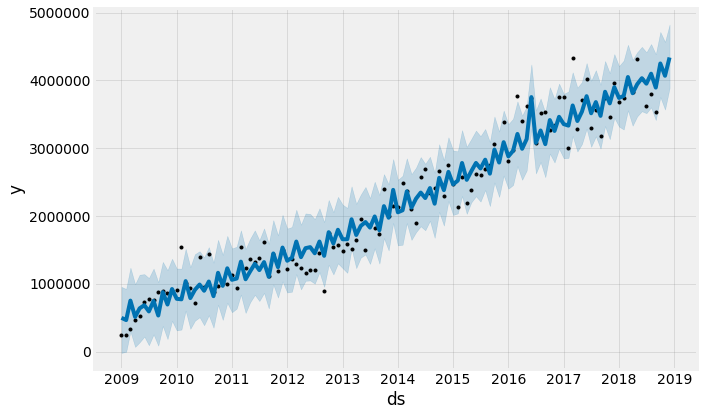

In [112]:
my_model2.plot(forecast2,
              uncertainty=True);

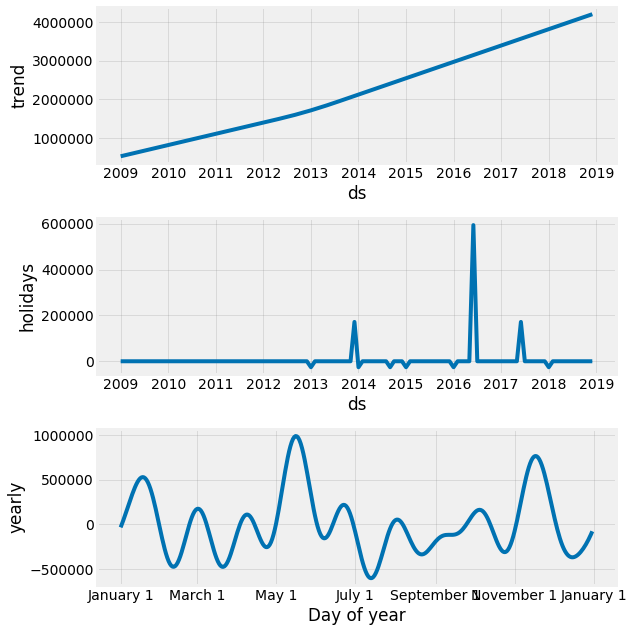

In [113]:
my_model2.plot_components(forecast2);

# LSTM prediction

In [114]:
#data8.head()
#mydata = data8.loc[:, ['Monthly Sales']]
#mydata = mydata.set_index(data8['DateTime'])
#mydata.head()

In [115]:
#from sklearn.preprocessing import MinMaxScaler
#values = mydata['Monthly Sales'].values.reshape(-1,1)
#values = values.astype('float32')
#scaler = MinMaxScaler(feature_range = (0,1))
#scaled = scaler.fit_transform(values)

In [116]:
#train_size = int(len(scaled) * 0.8)
#test_size = len(scaled) - train_size
#train, test = scaled[0:train_size, :], scaled[train_size : len(scaled), :]
#print( len(train), len(test))

In [117]:
#def create_dataset(dataset, look_back = 1):
 #   dataX, dataY = [], []
  #  for i in range(len(dataset) - look_back):
   #     a = dataset[i : (i + look_back), 0]
    #    dataX.append(a)
     #   dataY.append(dataset[i + look_back, 0])
    #print(len(dataY))
    #return np.array(dataX), np.array(dataY)

In [118]:
#look_back = 2
#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)

In [119]:
#trainX.shape[1]

In [120]:
#trainX = np.reshape(trainX, (trainX.shape[0], 2, 1 ) )
#testX = np.reshape(testX, (testX.shape[0], 2, 1 ) )

In [121]:
from keras.model import Sequential

ModuleNotFoundError: No module named 'keras'